# Huggingface OpenAI GPT and GPT2 models

Hugginface comes with several versions of the OpenAI GPT model for generating facke test

Here, we compare the original GPT with the later GPT2. 

Both models have the exact same architecture, but arev trained with different size data sets.
The GPT2 model is trained with a much larger data set and performs significantly better:


_"GPT-2 is a direct scale-up of GPT, with more than 10X the parameters and trained on more than 10X the amount of data."_  

 https://openai.com/blog/better-language-models/


### Observations

- The distrobution of $\alpha$ exponents is smaller
- Information flow is better in GPT2
- Frobenius and Spectral Norms are Larger for GPT2 vs GPT
- Embedding / first 2 layers, and last couple layes, have unusually large spectral norms

#### Could be a normalization issue ?

- BUT I think we see rank collapse in GPT, throwing the metrics


In [1]:
import numpy as np
import pandas as pd
import numpy as np
import scipy.sparse as sp
import random, datetime

from tqdm import tqdm 

import os, gc, logging
logger = logging.getLogger()

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install transformers

In [3]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

import weightwatcher as ww
print("weightwatcher version {}".format(ww.__version__))


Using TensorFlow backend.


weightwatcher version 0.2.5


In [4]:
import torch
import transformers
from transformers import OpenAIGPTModel,GPT2Model
print("transformers version {}".format(transformers.__version__))

INFO:transformers.file_utils:PyTorch version 1.3.1 available.


transformers version 2.3.0


In [5]:
gpt_model = OpenAIGPTModel.from_pretrained('openai-gpt')
gpt_model.eval();

INFO:transformers.configuration_utils:loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/openai-gpt-config.json from cache at /Users/charleshmartin/.cache/torch/transformers/a27bb7c70e9002d7558d2682d5a95f3c0a8b31034616309459e0b51ef07ade09.f59b19eb0e361a0230a1106b66b8c6e7a994cb200cd63d9190cda8d56d75ff85
INFO:transformers.configuration_utils:Model config {
  "afn": "gelu",
  "attn_pdrop": 0.1,
  "embd_pdrop": 0.1,
  "finetuning_task": null,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1"
  },
  "initializer_range": 0.02,
  "is_decoder": false,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1
  },
  "layer_norm_epsilon": 1e-05,
  "n_ctx": 512,
  "n_embd": 768,
  "n_head": 12,
  "n_layer": 12,
  "n_positions": 512,
  "n_special": 0,
  "num_labels": 2,
  "output_attentions": false,
  "output_hidden_states": false,
  "output_past": true,
  "predict_special_tokens": true,
  "pruned_heads": {},
  "resid_pdrop": 0.1,
  "summary_activation": null,
  "summary_

In [6]:
gpt2_model = GPT2Model.from_pretrained('gpt2')
gpt2_model.eval();

INFO:transformers.configuration_utils:loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-config.json from cache at /Users/charleshmartin/.cache/torch/transformers/4be02c5697d91738003fb1685c9872f284166aa32e061576bbe6aaeb95649fcf.085d5f6a8e7812ea05ff0e6ed0645ab2e75d80387ad55c1ad9806ee70d272f80
INFO:transformers.configuration_utils:Model config {
  "attn_pdrop": 0.1,
  "embd_pdrop": 0.1,
  "finetuning_task": null,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1"
  },
  "initializer_range": 0.02,
  "is_decoder": false,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1
  },
  "layer_norm_epsilon": 1e-05,
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_layer": 12,
  "n_positions": 1024,
  "num_labels": 2,
  "output_attentions": false,
  "output_hidden_states": false,
  "output_past": true,
  "pruned_heads": {},
  "resid_pdrop": 0.1,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": 

In [7]:
watcher = ww.WeightWatcher(model=gpt_model, logger=logger)
results = watcher.analyze(alphas=True, softranks=True, 
                          spectralnorms=True,  normalize=True)

summary =  watcher.get_summary()

details  = watcher.get_details(results=results)
details.drop(columns=['slice', 'slice_count'], inplace=True)
details.dropna(inplace=True)
details['NxM'] = pd.to_numeric(details.N * details.M) 

INFO:__main__:

python      version 3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.17.4
tensforflow version 1.15.0
keras       version 2.2.4
INFO:__main__:Analyzing model
INFO:__main__:analyze_weights normalize=True, glorot_fix=False count=1
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
INFO:__main__:analyze_weights normalize=True, glorot_fix=False count=1
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/power

INFO:__main__:analyze_weights normalize=True, glorot_fix=False count=1
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
INFO:__main__:analyze_weights normalize=True, glorot_fix=False count=1
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
INFO:__main__:analyze_weights normalize=True, glorot_fix=False count=1
/Users/charleshmartin/anaconda3/envs/ww/l

INFO:__main__:analyze_weights normalize=True, glorot_fix=False count=1
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
INFO:__main__:analyze_weights normalize=True, glorot_fix=False count=1
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
INFO:__main__:analyze_weights normalize=True, glorot_fix=False count=1
/Users/charleshmartin/anaconda3/envs/ww/l

INFO:__main__:Softrank Log: min: 0.5689415756537938, max: 2.1641808309183004, avg: 1.5379734546455066
INFO:__main__:Softrank Log compound: min: 0.5689415756537938, max: 2.1641808309183004, avg: 1.5379734546455066
INFO:__main__:Softrank Log Ratio: min: 1.1208311319351196, max: 5.626460075378418, avg: 2.340986490249634
INFO:__main__:Softrank Log Ratio compound: min: 1.1208311319351196, max: 5.626460075378418, avg: 2.340986490249634
INFO:__main__:alpha pNorm: min: -30.18689927397268, max: 0.3041312855340156, avg: -7.621351888229554
INFO:__main__:alpha pNorm compound: min: -30.18689927397268, max: 0.3041312855340156, avg: -7.621351888229554
INFO:__main__:### Printing results ###
INFO:__main__:Check: min: 0.03380704422791799, max: 0.12320485338300652, avg: 0.052763754847183625
INFO:__main__:Check compound: min: 0.03380704422791799, max: 0.12320485338300652, avg: 0.052763754847183625
INFO:__main__:CheckTF: min: False, max: False, avg: 0.0
INFO:__main__:CheckTF compound: min: 0.0, max: 0.0, a

In [8]:
watcher = ww.WeightWatcher(model=gpt2_model, logger=logger)
results2 = watcher.analyze(alphas=True, softranks=True, 
                          spectralnorms=True,  normalize=True)

summary2 =  watcher.get_summary()

details2  = watcher.get_details(results=results2)
details2.drop(columns=['slice', 'slice_count'], inplace=True)
details2.dropna(inplace=True)
details2['NxM'] = pd.to_numeric(details2.N * details2.M) 

INFO:__main__:

python      version 3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.17.4
tensforflow version 1.15.0
keras       version 2.2.4
INFO:__main__:Analyzing model
INFO:__main__:analyze_weights normalize=True, glorot_fix=False count=1
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
INFO:__main__:analyze_weights normalize=True, glorot_fix=False count=1
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/power

INFO:__main__:analyze_weights normalize=True, glorot_fix=False count=1
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
INFO:__main__:analyze_weights normalize=True, glorot_fix=False count=1
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
INFO:__main__:analyze_weights normalize=True, glorot_fix=False count=1
/Users/charleshmartin/anaconda3/envs/ww/l

INFO:__main__:analyze_weights normalize=True, glorot_fix=False count=1
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
INFO:__main__:analyze_weights normalize=True, glorot_fix=False count=1
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charleshmartin/anaconda3/envs/ww/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
INFO:__main__:analyze_weights normalize=True, glorot_fix=False count=1
/Users/charleshmartin/anaconda3/envs/ww/l

INFO:__main__:alpha pNorm: min: -7.722133416818069, max: 1.1700116636758633, avg: -2.688011551177192
INFO:__main__:alpha pNorm compound: min: -7.722133416818069, max: 1.1700116636758633, avg: -2.688011551177192
INFO:__main__:### Printing results ###
INFO:__main__:Check: min: 0.08103540539741516, max: 0.19961957484483284, avg: 0.1271023109924772
INFO:__main__:Check compound: min: 0.08103540539741516, max: 0.19961957484483284, avg: 0.1271023109924772
INFO:__main__:CheckTF: min: False, max: False, avg: 0.0
INFO:__main__:CheckTF compound: min: 0.0, max: 0.0, avg: 0.0
INFO:__main__:Norm: min: 44.006927490234375, max: 631.2603149414062, avg: 126.1707992553711
INFO:__main__:Norm compound: min: 44.006927490234375, max: 631.2603149414062, avg: 126.1707992553711
INFO:__main__:LogNorm: min: 1.6435210704803467, max: 2.800208568572998, avg: 2.0508360862731934
INFO:__main__:LogNorm compound: min: 1.6435210704803467, max: 2.800208568572998, avg: 2.0508360862731934
INFO:__main__:Norm X: min: 0.1942362

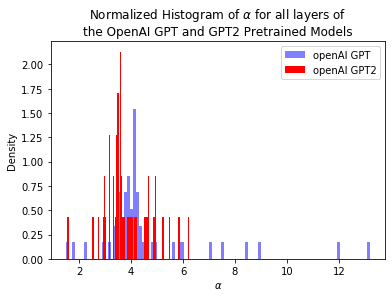

In [9]:
details['alpha'].plot.hist(bins=100, color='blue', alpha=0.5, density=True, label='openAI GPT')
details2['alpha'].plot.hist(bins=100,  color='red', density=True, label='openAI GPT2')
plt.legend()
plt.title(r"Normalized Histogram of $\alpha$ for all layers of"+"\nthe OpenAI GPT and GPT2 Pretrained Models")
plt.xlabel(r"$\alpha$")
plt.ylabel("Density")
plt.show()


In [30]:
summary['logpnorm'], summary2['logpnorm']

(8.239360311516695, 10.630367469249467)

In [31]:
summary['alpha_weighted'], summary2['alpha_weighted']

(7.970404908972466, 10.3816839949486)

In [32]:
summary['spectralnorm'], summary2['spectralnorm']

(1202.44, 2871.833)

In [33]:
logsnorm = [np.log10(x) for x in details['spectralnorm'].to_numpy()]
logsnorm2 = [np.log10(x) for x in details2['spectralnorm'].to_numpy()]


In [34]:
plt.rcParams.update({'font.size': 20})
from pylab import rcParams
rcParams['figure.figsize'] = 10,10

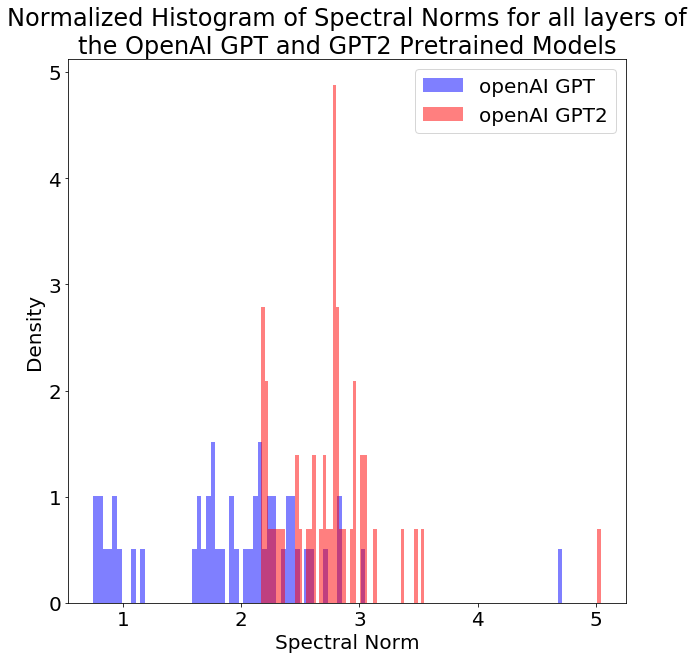

In [35]:
plt.hist(logsnorm, bins=100, color='blue', alpha=0.5, density=True, label='openAI GPT')
plt.hist(logsnorm2, bins=100, color='red', alpha=0.5, density=True, label='openAI GPT2')

plt.legend()
plt.title(r"Normalized Histogram of Spectral Norms for all layers of"+"\nthe OpenAI GPT and GPT2 Pretrained Models")
plt.xlabel("Spectral Norm")
plt.ylabel("Density")
plt.show()

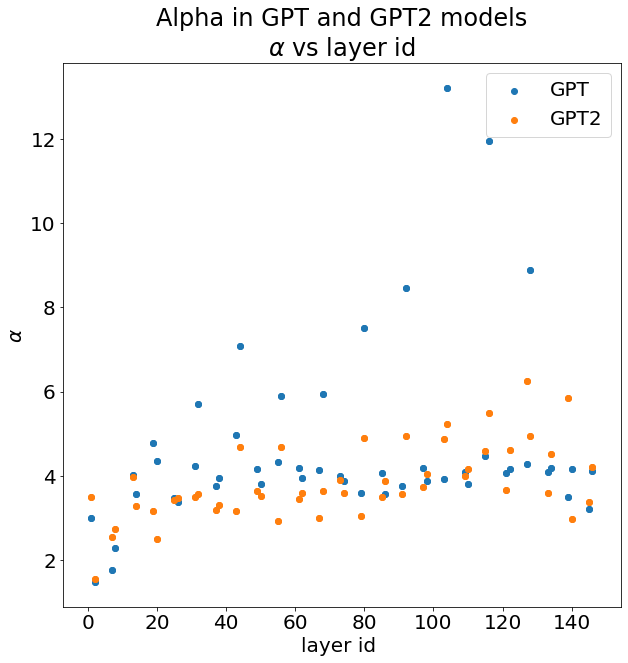

In [41]:
x = np.array(details.index)
y = details.alpha.to_numpy(dtype=np.float)
plt.scatter(x,y, label='GPT')

y2 = details2.alpha.to_numpy(dtype=np.float)
plt.scatter(x,y2, label='GPT2')

plt.xlabel("layer id ")
plt.ylabel(r"$\alpha$")
plt.legend()
plt.title("Alpha in GPT and GPT2 models\n"+r"$\alpha$ vs layer id")
plt.savefig("img/GPT-alpha-depth.png")

In [37]:
details.alpha[0:10]

layer_id
1     2.99837
1     2.99837
2      1.4903
2      1.4903
7     1.77493
7     1.77493
8     2.28394
8     2.28394
13    4.01376
13    4.01376
Name: alpha, dtype: object

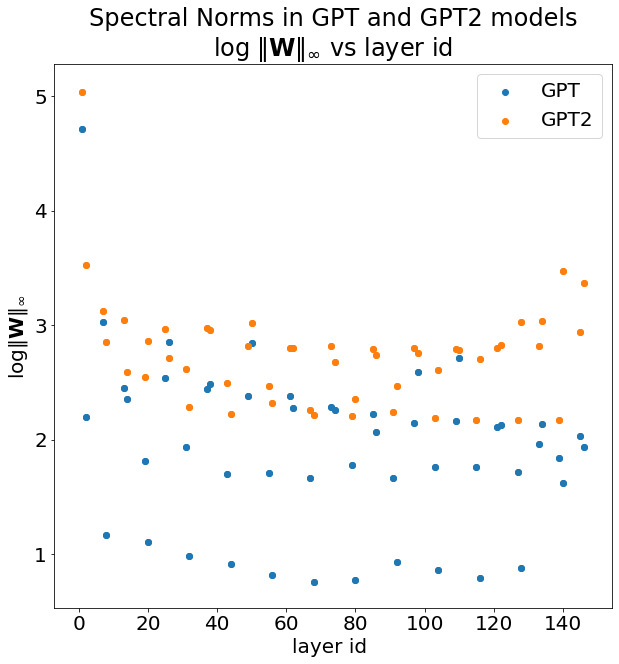

In [44]:
x = np.array(details.index)
y = np.log10(details.spectralnorm.to_numpy(dtype=np.float))
plt.scatter(x,y, label='GPT')

y2 = np.log10(details2.spectralnorm.to_numpy(dtype=np.float))
plt.scatter(x,y2, label='GPT2')

plt.xlabel("layer id ")
plt.ylabel(r"$\log\Vert\mathbf{W}\Vert_{\infty}$")
plt.legend()
plt.title("Spectral Norms in GPT and GPT2 models\n"+r"$\log\;\Vert\mathbf{W}\Vert_{\infty}$ vs layer id")
plt.savefig("img/GPT-snorm-depth.png")

In [39]:
details2.head(2)

,layer_type,N,M,level,comment,check,checkTF,norm,lognorm,normX,lognormX,alpha,alpha_weighted,spectralnorm,softrank,softranklog,softranklogratio,logpnorm,NxM
layer_id,,,,,,,,,,,,,,,,,,,
1,CONV1D,50257,768,LEVEL.SLICE,Slice level,0.143696,False,142594,5.1541,110875,5.04483,3.50582,17.6746,110031,3.67695,0.565488,1.05804,17.6746,38597376
1,CONV1D,50257,768,LEVEL.LAYER,Layer level,0.143696,0,142594,5.1541,110875,5.04483,3.50582,17.6746,110031,3.67695,0.565488,1.05804,17.6746,38597376


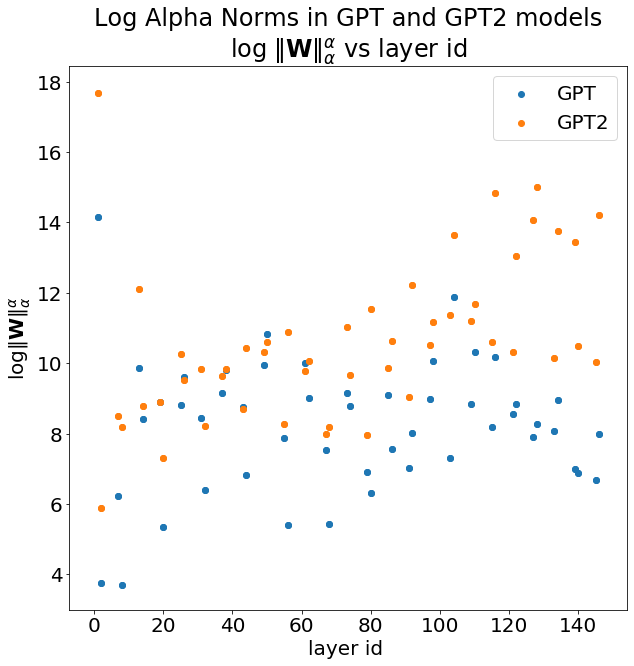

In [45]:
x = np.array(details.index)
y = details.logpnorm.to_numpy(dtype=np.float)
plt.scatter(x,y, label='GPT')

y2 = details2.logpnorm.to_numpy(dtype=np.float)
plt.scatter(x,y2, label='GPT2')

plt.xlabel("layer id ")
plt.ylabel(r"$\log\Vert\mathbf{W}\Vert_{\alpha}^{\alpha}$")
plt.legend()
plt.title("Log Alpha Norms in GPT and GPT2 models\n"+r"$\log\;\Vert\mathbf{W}\Vert_{\alpha}^{\alpha}$ vs layer id")
plt.savefig("img/GPT-pnorm-depth.png")